In [1]:
import os
os.getcwd()

os.chdir('E:\Resume_related')
os.getcwd()


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("loan_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#heatmap

<AxesSubplot:>

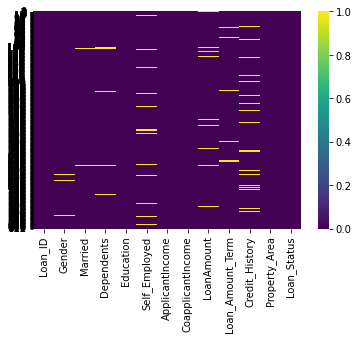

In [4]:
sns.heatmap(df.isnull(),yticklabels=True,cbar=True,cmap='viridis')


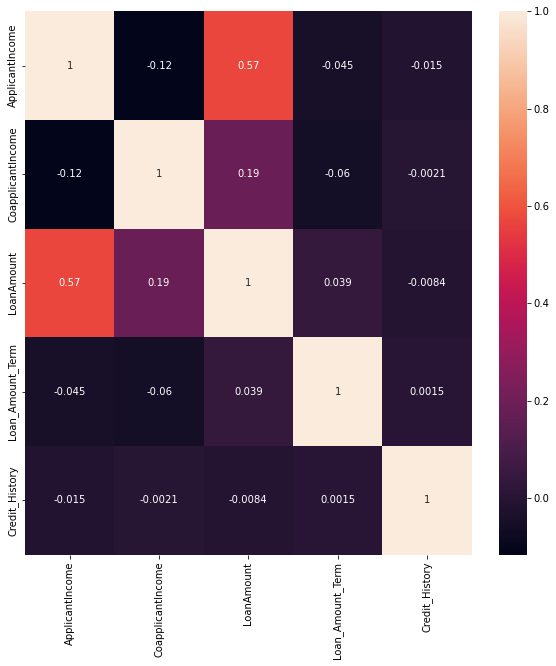

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [6]:
#The get_dummies() function is used to convert categorical variable into dummy/indicator variables (0’s and 1’s)

In [7]:
sex = pd.get_dummies(df['Gender'],drop_first=True)
married = pd.get_dummies(df['Married'],drop_first=True)
education = pd.get_dummies(df['Education'],drop_first=True)
loanStatus = pd.get_dummies(df['Loan_Status'],drop_first=True)
PropArea = pd.get_dummies(df['Property_Area'],drop_first=True)
df.drop(['Gender','Loan_ID','Married','Education','Loan_Status','Property_Area'],axis=1,inplace=True)
df = pd.concat([df,married,education,sex,loanStatus,PropArea],axis=1)
df.head()

,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Yes,Not Graduate,Male,Y,Semiurban,Urban
0,0,No,5849,0.0,NaN,360.0,1.0,0,0,1,1,0,1
1,1,No,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0
2,0,Yes,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,1
3,0,No,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,1
4,0,No,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,1


In [8]:
df = df.rename(columns={'Yes':'Married'})

In [9]:
self_emp=pd.get_dummies(df['Self_Employed'],drop_first=True)
df=pd.concat([df,self_emp], axis = 1)
df.drop(['Self_Employed'],axis=1,inplace=True)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Not Graduate,Male,Y,Semiurban,Urban,Yes
0,0,5849,0.0,NaN,360.0,1.0,0,0,1,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,1,0


In [10]:
df = df.rename(columns={'Yes':'Self_Employed'})
df = df.rename(columns={'Male':'Gender'})



In [11]:
#Rename the columns after data manipulation.

In [12]:
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Not Graduate,Gender,Y,Semiurban,Urban,Self_Employed
0,0,5849,0.0,NaN,360.0,1.0,0,0,1,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,1,0


In [13]:
# Heat map after introducing dummy variables.

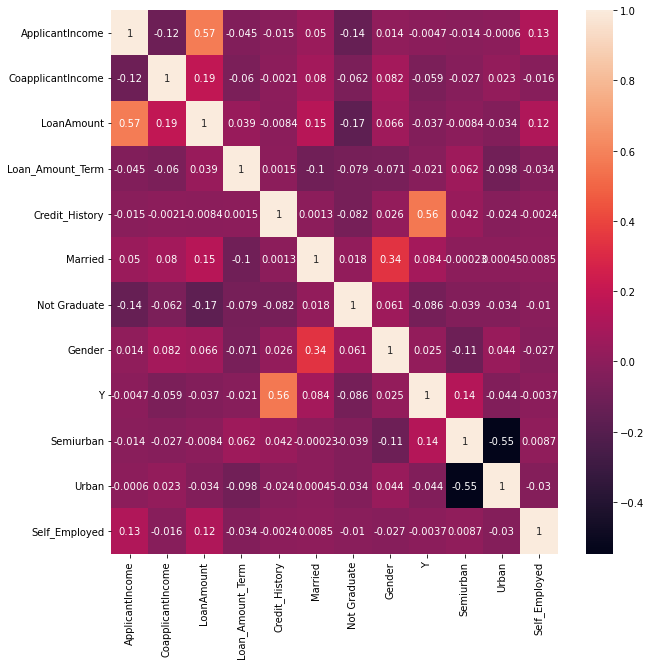

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [15]:
#We write the impute_LoanAmount function to replace the null Loan Amount values with the values calculated by the function

In [16]:
def impute_LoanAmt(cols):
    Loan = cols[0]
    selfemp = cols[1]
    
    if pd.isnull(Loan):

        if selfemp == 1:
            return 150
        else:
            return 125

    else:
        return Loan

In [17]:
#Apply the impute_LoanAmt function on the dataset

<AxesSubplot:>

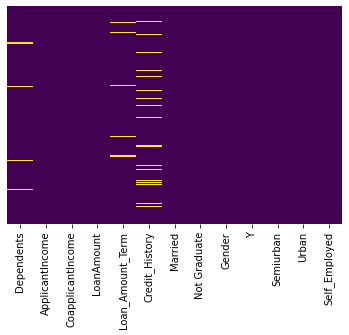

In [18]:
df['LoanAmount'] = df[['LoanAmount','Self_Employed']].apply(impute_LoanAmt,axis=1)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

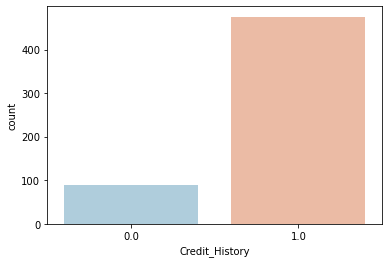

In [19]:
sns.countplot(x='Credit_History',data=df,palette='RdBu_r')

In [20]:
#From the above count plot we can see that most of the credit history values are 1.0. So we can replace the null values by 1.0.

In [21]:
df['Credit_History'].fillna(1.0,inplace=True)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

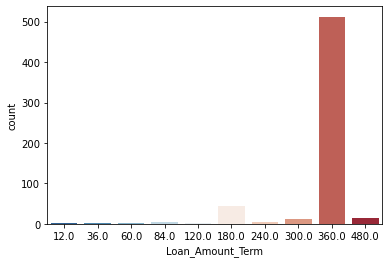

In [22]:
sns.countplot(x='Loan_Amount_Term',data=df,palette='RdBu_r')

In [23]:
#From the above count plot we can see that most of the Loan amount term values are 360. So we can replace the null values by 360.

In [24]:
df['Loan_Amount_Term'].fillna(360,inplace=True)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

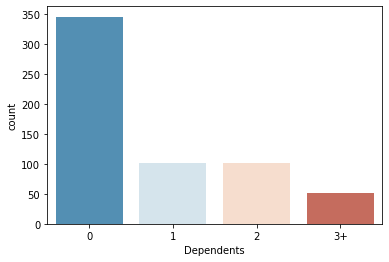

In [25]:
sns.countplot(x='Dependents',data=df,palette='RdBu_r')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         599 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Married            614 non-null    uint8  
 7   Not Graduate       614 non-null    uint8  
 8   Gender             614 non-null    uint8  
 9   Y                  614 non-null    uint8  
 10  Semiurban          614 non-null    uint8  
 11  Urban              614 non-null    uint8  
 12  Self_Employed      614 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(7)
memory usage: 33.1+ KB


In [27]:
#From the above count plot we can see that most of the ‘Dependents’ values are 0. So we can replace the null values by 0.

In [28]:
df['Dependents'].fillna(360,inplace=True)

In [29]:
#Heatmap after eliminating all the null values

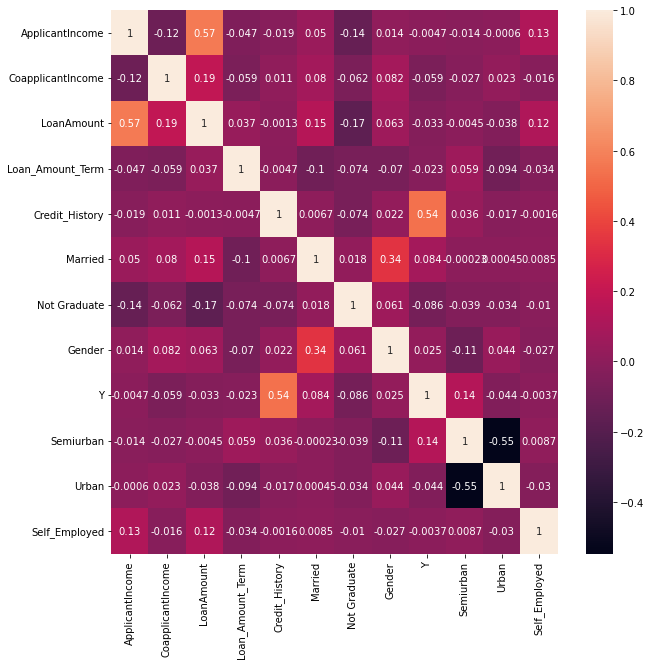

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [31]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         614 non-null    object 
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Married            614 non-null    uint8  
 7   Not Graduate       614 non-null    uint8  
 8   Gender             614 non-null    uint8  
 9   Y                  614 non-null    uint8  
 10  Semiurban          614 non-null    uint8  
 11  Urban              614 non-null    uint8  
 12  Self_Employed      614 non-null    uint8  
dtypes: float64(4), int64(1), object(1), uint8(7)
memory usage: 33.1+ KB


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Not Graduate,Gender,Y,Semiurban,Urban,Self_Employed
0,0,5849,0.0,125.0,360.0,1.0,0,0,1,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,1,0


In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train=pd.DataFrame(df)
train['Dependents'] =train['Dependents'].replace('3+', 3, regex=True)
train.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Not Graduate,Gender,Y,Semiurban,Urban,Self_Employed
0,0,5849,0.0,125.0,360.0,1.0,0,0,1,1,0,1,0
1,1,4583,1508.0,128.0,360.0,1.0,1,0,1,0,0,0,0
2,0,3000,0.0,66.0,360.0,1.0,1,0,1,1,0,1,1
3,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,0,1,1,0,1,0


In [33]:
scaler.fit(train)
scaled_features = scaler.transform(train)
df_feat = pd.DataFrame(scaled_features,columns=train.columns)

In [34]:
df.dropna(subset=['Gender'], inplace=True)
df.dropna(subset=['Married'], inplace=True)
df.dropna(subset=['Self_Employed'], inplace=True)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Y'],test_size=0.30,random_state=42)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 56   9]
 [  1 119]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        65
           1       0.93      0.99      0.96       120

    accuracy                           0.95       185
   macro avg       0.96      0.93      0.94       185
weighted avg       0.95      0.95      0.95       185



Text(0, 0.5, 'Error Rate')

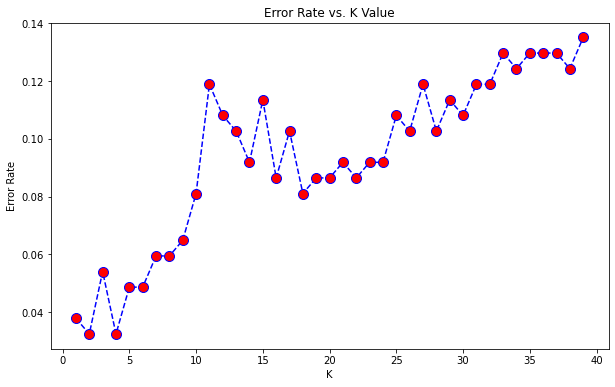

In [40]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred))

0.9459459459459459


In [43]:
x=df[['Married', 'Not Graduate', 'Dependents',
       'Self_Employed','ApplicantIncome','CoapplicantIncome','Semiurban','Urban','Loan_Amount_Term']]
y=df['LoanAmount']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [46]:
print(lm.intercept_)

59.86213721290406


In [47]:
#coefficiants in linear regression

In [48]:
coeff=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff

,Coefficient
Married,27.457135
Not Graduate,-14.372581
Dependents,-0.039848
Self_Employed,15.924838
ApplicantIncome,0.006990
CoapplicantIncome,0.006741
Semiurban,-7.872989
Urban,-11.924060
Loan_Amount_Term,0.077496


In [49]:
lm.predict([[1,0,3,1,4000,3000,0,1,360]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([167.27901422])

In [50]:
#B

In [51]:

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [52]:
xgb_regressor = XGBRegressor(
    objective='reg:squarederror',  # Specify the regression objective
    n_estimators=100,              # Number of boosting rounds (trees)
    learning_rate=0.1,             # Learning rate
    max_depth=3                    # Maximum depth of each tree
)

In [53]:
# Fit the model to the training data
xgb_regressor.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = xgb_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:Dependents: object

In [ ]:
yhat = model.predict([[1,0,3,1,4000,3000,0,1,360,1.0]])